# Clustering - KMeans

Importando bibliotecas

In [1]:
import gsidiag as gd
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Definindo parâmetros para o uso do readDiag

In [2]:
#DIRdiag = "/home/patrick/readDiag/data"
DIRdiag = "/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout"
#D:\ftp1.cptec.inpe.br\pesquisa\das\joao.gerd\EXP18\GSI\dataout
varName = "amsua"
varType = "n15"
dateIni="2020010100" 
dateFin="2020010206" 
nHour = "6"          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
Level = 1000
Lay = None           
SingleL = "All" 

datei = datetime.strptime(str(dateIni), "%Y%m%d%H")
datef = datetime.strptime(str(dateFin), "%Y%m%d%H")
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq="6H").tolist()]

print(dates)


['2020010100', '2020010106', '2020010112', '2020010118', '2020010200', '2020010206']


Encontrando e listando arquivos para serem usados

In [3]:
paths, pathsc = [], []

OuterL = "01"        
[paths.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterL+"."+dt) for dt in dates]

OuterLc = "03"
[pathsc.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterLc+"."+dt) for dt in dates]

print(paths)
print("")
print(pathsc)

['/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206']

['/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_03.2020010100', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_03.2020010106', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_03.2020010112', '/mnt/d

Lendo arquivos listado usando o readDiag e concatenando os dados

In [4]:
# Define uma variável booleana 'read' como True para indicar que a leitura dos arquivos será realizada
read = True

# Verifica se 'read' é True para prosseguir com a leitura dos arquivos
if read:        
    # Inicializa uma lista vazia para armazenar os objetos gdf
    gdf_list = []
    # Imprime uma mensagem informando o tempo estimado necessário para a leitura dos arquivos
    print("")
    print("Aguarde, o tempo total estimado para a leitura dos arquivos é de "+
          str(int((float(len(paths))*20 )/60))+" minutos e "+
          str(int((float(len(paths))*20 )%60))+" segundos.")
    print("")
    # Itera sobre os caminhos dos arquivos e seus caminhos de configuração correspondentes
    for path, pathc in zip(paths,pathsc):
        # Imprime uma mensagem indicando o arquivo que está sendo lido
        print("Reading "+path)
        # Lê o arquivo usando a função read_diag do módulo gsidiag e armazena o objeto retornado em gdf
        gdf = gd.read_diag(path,pathc)
        # Adiciona o objeto gdf à lista gdf_list
        gdf_list.append(gdf)

    # Imprime a lista de objetos gdf lidos
    print(gdf_list)
    
    # Define uma string separadora para uso posterior
    separator = " ====================================================================================================="



Aguarde, o tempo total estimado para a leitura dos arquivos é de 2 minutos e 0 segundos.

Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206
 
>>> GSI DIAG <<<
 
[<gsidiag.__main__.read_diag object at 0x7f1600456580>, <gsidiag.__main__.read_diag object at

In [5]:
# Inicialização de DataFrame vazio para armazenar dados concatenados
df_concatenado2 = pd.DataFrame()

# Iteração sobre objetos em gdf_list
for objeto in gdf_list:
        
    print(separator)
    print("Separando dados do arquivo" + str(objeto._diagFile))
    
    # Criação de dicionário de dados a partir do objeto   
    dados_dict = {
            'lat': objeto.obsInfo[varName].loc[varType].lat,
            'lon': objeto.obsInfo[varName].loc[varType].lon,
            'elev': objeto.obsInfo[varName].loc[varType].elev,
            'nchan': objeto.obsInfo[varName].loc[varType].nchan,
            'time': objeto.obsInfo[varName].loc[varType].time,
            'iuse': objeto.obsInfo[varName].loc[varType].iuse,
            'idqc': objeto.obsInfo[varName].loc[varType].idqc,
            'inverr': objeto.obsInfo[varName].loc[varType].inverr,
            'oer': objeto.obsInfo[varName].loc[varType].oer,
            'obs': objeto.obsInfo[varName].loc[varType].obs,
            'omf': objeto.obsInfo[varName].loc[varType].omf,
            'omf_nobc': objeto.obsInfo[varName].loc[varType].omf_nobc,
            'emiss': objeto.obsInfo[varName].loc[varType].emiss,
            'oma': objeto.obsInfo[varName].loc[varType].oma,
            'oma_nobc': objeto.obsInfo[varName].loc[varType].oma_nobc,
            'imp': objeto.obsInfo[varName].loc[varType].imp,
            'dfs': objeto.obsInfo[varName].loc[varType].dfs
            }
        
    # Conversão do dicionário em DataFrame
    df_objeto = pd.DataFrame(dados_dict)
        
    # Concatenação do DataFrame do objeto com o DataFrame concatenado
    df_concatenado2 = pd.concat([df_concatenado2, df_objeto], ignore_index=True)
    

Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206


In [6]:
# Remoção de linhas com valores NaN
df_concatenado2.dropna(inplace=True)

# Filtrando os canais sub-representados
df_concatenado2 = df_concatenado2[~df_concatenado2['nchan'].isin([1, 2, 3, 4, 5, 6, 15])]

print(df_concatenado2)

print(separator)

              lat         lon         elev  nchan      time  iuse  idqc  \
6      -87.504501   19.704599  2735.045410    7.0  0.315833   1.0   0.0   
7      -87.504501   19.704599  2735.045410    8.0  0.315833   1.0   0.0   
8      -87.504501   19.704599  2735.045410    9.0  0.315833   1.0   0.0   
9      -87.504501   19.704599  2735.045410   10.0  0.315833   1.0   0.0   
11     -87.504501   19.704599  2735.045410   12.0  0.315833   1.0   0.0   
...           ...         ...          ...    ...       ...   ...   ...   
697642  69.849403  359.350891    -0.074034    8.0  1.566111   1.0   0.0   
697643  69.849403  359.350891    -0.074034    9.0  1.566111   1.0   0.0   
697644  69.849403  359.350891    -0.074034   10.0  1.566111   1.0   0.0   
697646  69.849403  359.350891    -0.074034   12.0  1.566111   1.0   0.0   
697647  69.849403  359.350891    -0.074034   13.0  1.566111   1.0   0.0   

          inverr       oer         obs       omf  omf_nobc     emiss  \
6       3.996653  0.250215 

In [7]:
#from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
atributos = ["nchan", "oer", "omf", "oma", "imp", "dfs"]
df_dados = df_concatenado2[atributos].copy()

n_clusters = 2  # Número de clusters desejados
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_dados['cluster'] = kmeans.fit_predict(df_dados.drop('nchan', axis=1))

print(df_dados)

        nchan       oer       omf       oma       imp       dfs  cluster
6         7.0  0.250215 -0.077042 -0.099744  0.016040  0.006990        0
7         8.0  0.275001  0.023001  0.004765 -0.001841 -0.001525        0
8         9.0  0.340001 -0.086228 -0.097860  0.006298  0.002950        0
9        10.0  0.400003  0.199955  0.172721 -0.025374 -0.013614        0
11       12.0  1.000170 -0.226885 -0.449353  0.150416  0.050466        0
...       ...       ...       ...       ...       ...       ...      ...
697642    8.0  0.275000 -0.161960 -0.141681 -0.022391 -0.011943        0
697643    9.0  0.340001  0.135727  0.333374  0.272694  0.078900        0
697644   10.0  0.400004 -0.168763 -0.039763 -0.067249 -0.054425        0
697646   12.0  1.000201  0.968339  0.209626 -0.893557 -0.734543        1
697647   13.0  1.501542  1.329919  0.047907 -1.176385 -1.135482        1

[278908 rows x 7 columns]


In [9]:
# Análise dos Clusters
# Estatísticas descritivas para cada cluster
cluster_stats = df_dados.groupby('cluster').describe()

# Configurar o pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(cluster_stats)

            nchan                                                         oer  \
            count       mean       std  min   25%   50%   75%   max     count   
cluster                                                                         
0        210515.0   8.986747  1.611436  7.0   8.0   9.0  10.0  13.0  210515.0   
1         68393.0  12.436214  1.120620  7.0  12.0  13.0  13.0  13.0   68393.0   

                                                                         \
             mean       std   min      25%       50%       75%      max   
cluster                                                                   
0        0.414384  0.255045  0.25  0.27500  0.340001  0.400003  1.50230   
1        1.283765  0.338648  0.25  1.00018  1.501139  1.501377  1.50233   

              omf                                                              \
            count      mean       std       min       25%       50%       75%   
cluster                                                 

In [10]:
# Visualização dos Clusters
# Gráfico de scatter plot dos clusters para pares de atributos
#sns.pairplot(df_dados, hue='cluster', palette='Set1')
#plt.show()


/tmp/ipykernel_82935/1231500223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=atributo, data=df_dados, palette='Set1')


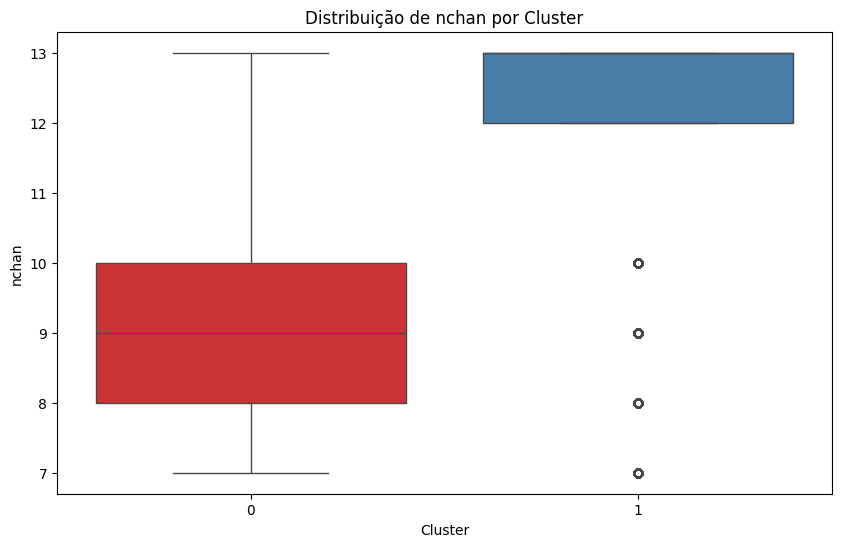

/tmp/ipykernel_82935/1231500223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=atributo, data=df_dados, palette='Set1')


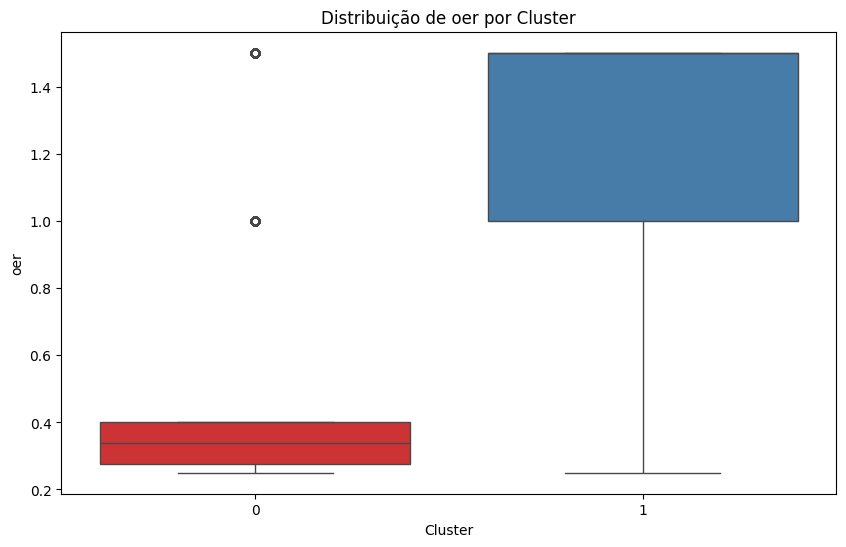

/tmp/ipykernel_82935/1231500223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=atributo, data=df_dados, palette='Set1')


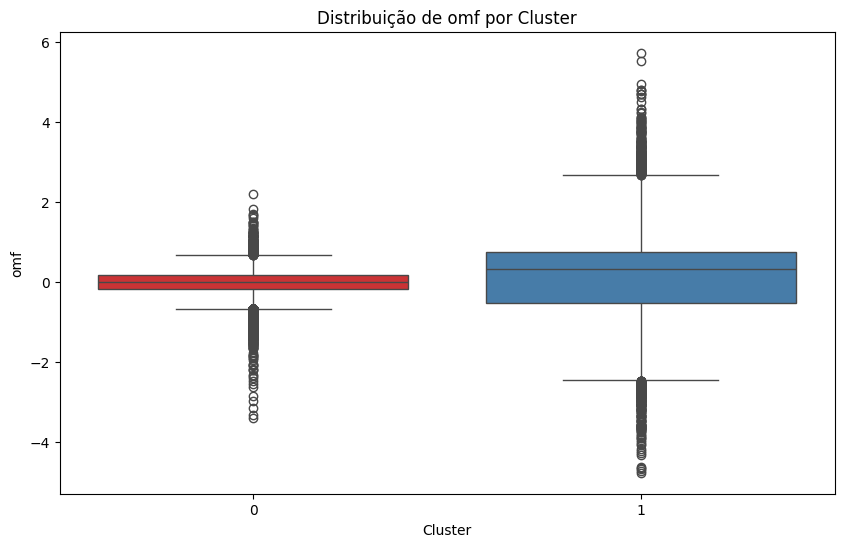

/tmp/ipykernel_82935/1231500223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=atributo, data=df_dados, palette='Set1')


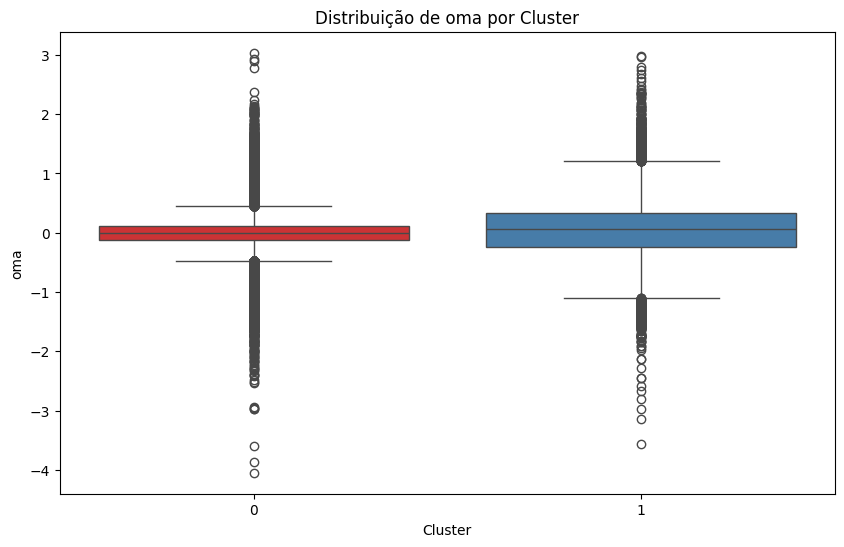

/tmp/ipykernel_82935/1231500223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=atributo, data=df_dados, palette='Set1')


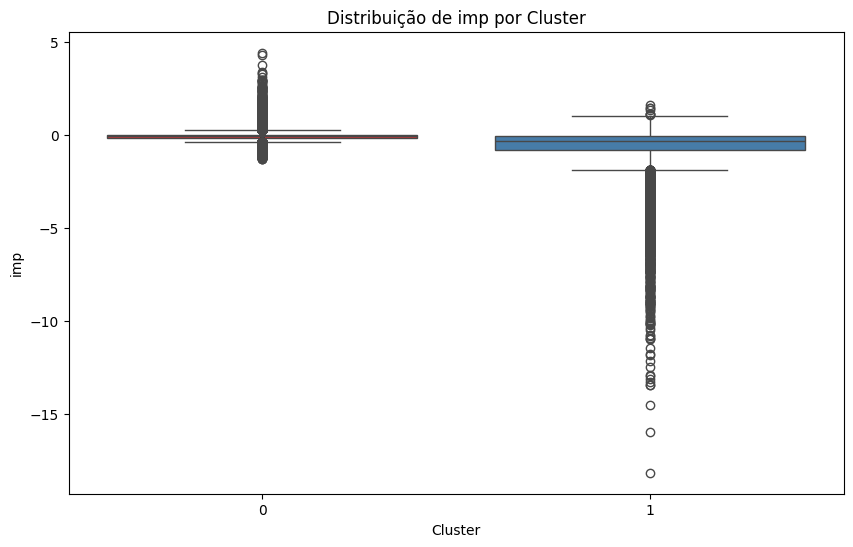

/tmp/ipykernel_82935/1231500223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=atributo, data=df_dados, palette='Set1')


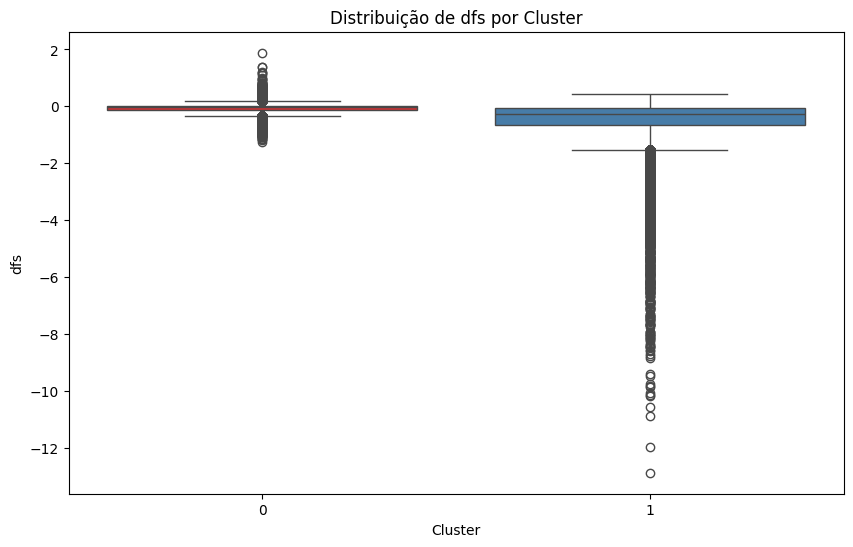

In [11]:
# Visualização da distribuição dos clusters para cada atributo
for atributo in df_dados.columns[:-1]:  # Excluindo a coluna 'cluster'
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=atributo, data=df_dados, palette='Set1')
    plt.title(f'Distribuição de {atributo} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(atributo)
    plt.show()

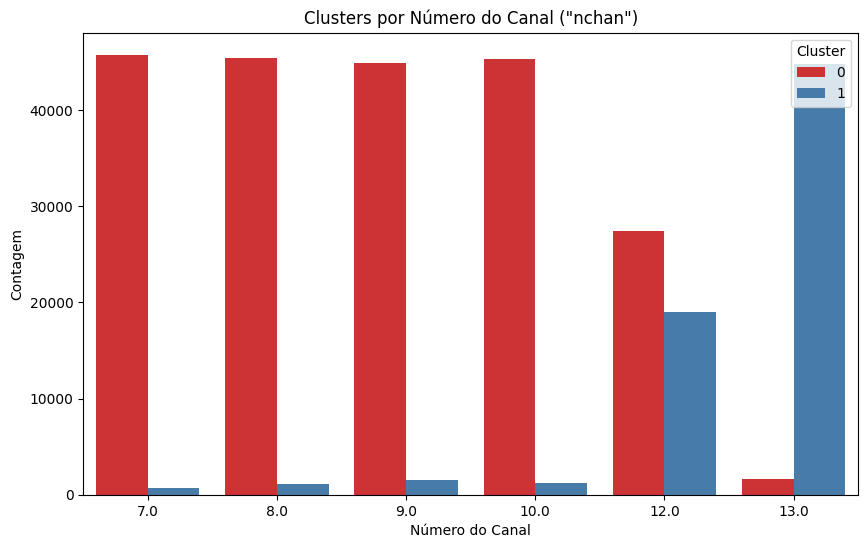

In [12]:
# Gráfico de barras para visualizar os clusters de acordo com o número do canal ("nchan")
plt.figure(figsize=(10, 6))
sns.countplot(data=df_dados, x='nchan', hue='cluster', palette='Set1')
plt.title('Clusters por Número do Canal ("nchan")')
plt.xlabel('Número do Canal')
plt.ylabel('Contagem')
plt.legend(title='Cluster')
plt.show()

In [13]:
# Tabela de contagem da frequência de ocorrência de cada canal para cada cluster
cluster_channel_count = df_dados.groupby(['cluster', 'nchan']).size().reset_index(name='count')

# Separar a contagem por cluster
cluster_0_count = cluster_channel_count[cluster_channel_count['cluster'] == 0]
cluster_1_count = cluster_channel_count[cluster_channel_count['cluster'] == 1]

# Ordenar as contagens de frequência de ocorrência de cada canal em ordem decrescente
cluster_0_count_sorted = cluster_0_count.sort_values(by='count', ascending=False)
cluster_1_count_sorted = cluster_1_count.sort_values(by='count', ascending=False)

# Visualização da tabela de contagem para cada cluster ordenada por contagem decrescente
print("Cluster 0:")
print(cluster_0_count_sorted)
print("\nCluster 1:")
print(cluster_1_count_sorted)

Cluster 0:
   cluster  nchan  count
0        0    7.0  45763
1        0    8.0  45411
3        0   10.0  45310
2        0    9.0  44952
4        0   12.0  27479
5        0   13.0   1600

Cluster 1:
    cluster  nchan  count
11        1   13.0  44832
10        1   12.0  19000
8         1    9.0   1556
9         1   10.0   1199
7         1    8.0   1098
6         1    7.0    708


In [14]:
# from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calcular o coeficiente de Silhouette
# silhouette_avg = silhouette_score(df_dados.drop('nchan', axis=1), df_dados['cluster'])
# print("Coeficiente de Silhouette:", silhouette_avg)

# Calcular o índice Davies-Bouldin
# davies_bouldin_index = davies_bouldin_score(df_dados.drop('nchan', axis=1), df_dados['cluster'])
# print("Índice Davies-Bouldin:", davies_bouldin_index)

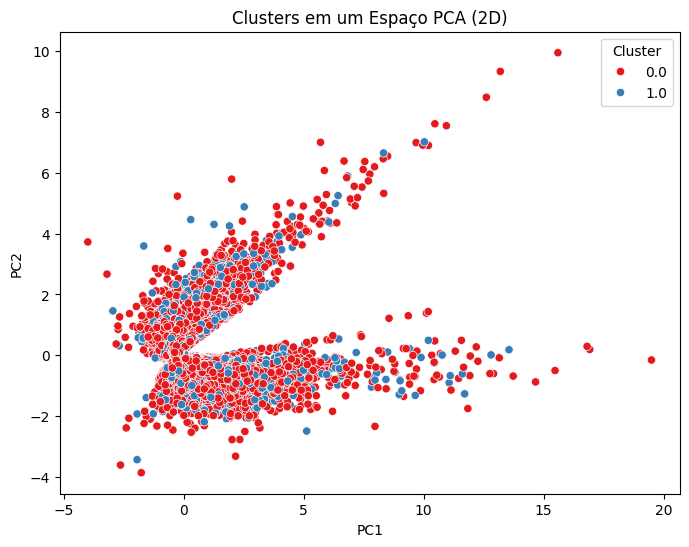

In [15]:
from sklearn.decomposition import PCA

# Aplicar PCA para reduzir a dimensionalidade dos dados para visualização
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_dados.drop(['cluster', 'nchan'], axis=1))

# Adicionar os clusters aos dados PCA
df_pca_with_cluster = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca_with_cluster['cluster'] = df_dados['cluster']

# Plotar os dados PCA coloridos por cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_with_cluster, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title('Clusters em um Espaço PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

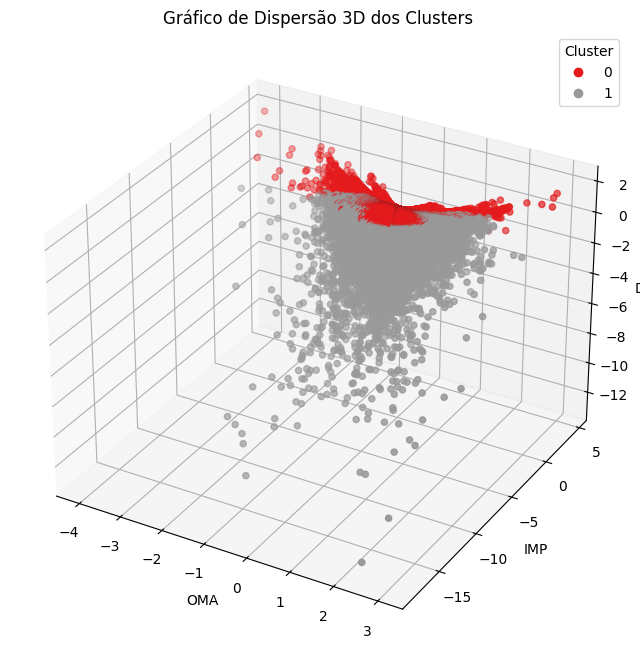

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Plotar os dados em um gráfico de dispersão 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definir os eixos
x = df_dados['oma']
y = df_dados['imp']
z = df_dados['dfs']

# Plotar os dados coloridos por cluster
scatter = ax.scatter(x, y, z, c=df_dados['cluster'], cmap='Set1')
ax.set_title('Gráfico de Dispersão 3D dos Clusters')
ax.set_xlabel('OMA')
ax.set_ylabel('IMP')
ax.set_zlabel('DFS')

plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

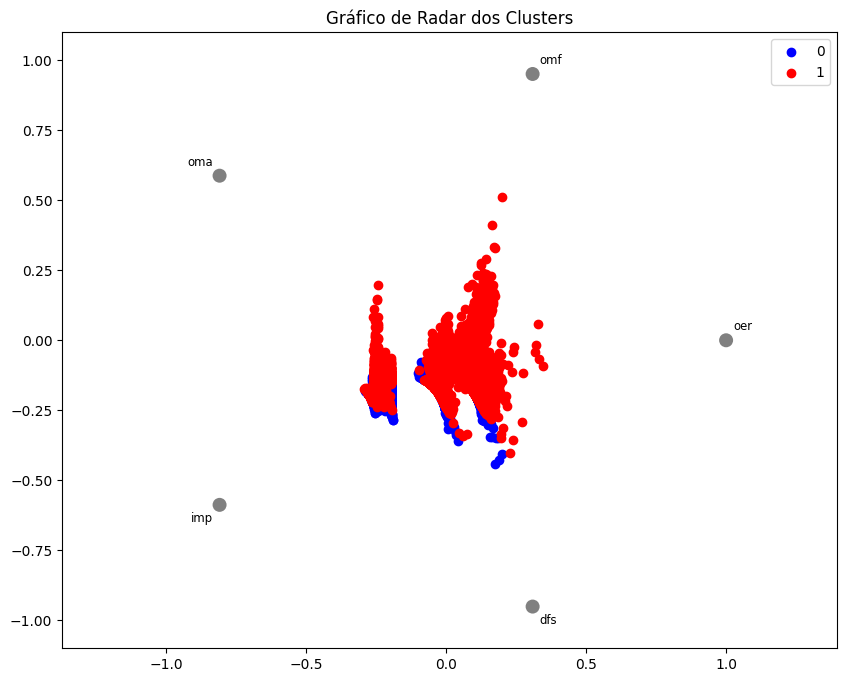

In [17]:
from pandas.plotting import radviz

# Adicione os clusters ao DataFrame
df_dados_with_cluster = df_dados.drop('nchan', axis=1).copy()
df_dados_with_cluster['cluster'] = df_dados_with_cluster['cluster'].astype(str)

# Plotar o gráfico de radar
plt.figure(figsize=(10, 8))
radviz(df_dados_with_cluster, 'cluster', color=['blue', 'red'])
plt.title('Gráfico de Radar dos Clusters')
plt.show()


In [41]:
import numpy as np

def calculate_entropy(data):
    """Função para calcular a entropia de um conjunto de dados."""
    _, counts = np.unique(data, return_counts=True)
    probabilities = counts / len(data)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_cluster_attribute_entropy(cluster_data):
    """Função para calcular a entropia de cada atributo em um cluster."""
    attribute_entropies = {}
    for attribute in cluster_data.columns:
        attribute_data = cluster_data[attribute]
        entropy = calculate_entropy(attribute_data)
        attribute_entropies[attribute] = entropy
    return attribute_entropies

# Calcular a entropia de cada atributo em cada cluster
cluster_attribute_entropies = {}
for cluster_id, cluster_data in df_dados.groupby('cluster'):
    cluster_attribute_entropies[cluster_id] = calculate_cluster_attribute_entropy(cluster_data.drop(['cluster', 'nchan'], axis=1))

print("Entropia de Atributos por Cluster:")
for cluster_id, attribute_entropies in cluster_attribute_entropies.items():
    print(f"Cluster {cluster_id}:")
    for attribute, entropy in attribute_entropies.items():
        print(f"  {attribute}: {entropy}")

Entropia de Atributos por Cluster:
Cluster 0:
  oer: 8.96698900764542
  omf: 17.680747771876543
  oma: 17.68096036901927
  imp: 17.68126438536015
  dfs: 17.68132138842407
  cluster_encoded: -0.0
Cluster 1:
  oer: 12.55278950693595
  omf: 16.0602451287316
  oma: 16.06074225563055
  imp: 16.06042058528417
  dfs: 16.060449828042934
  cluster_encoded: -0.0
